<a href="https://colab.research.google.com/github/jayvazil/machnlnclss/blob/main/MlClassExamples.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt


In [ ]:
# Sample DataFrame with missing values
data = {'A': [1, 2, np.nan, 4, 5],
'B': [np.nan, 2, 3, np.nan, 5],
'C': [1, 2, 3, 4, 5]}

In [ ]:
df = pd.DataFrame(data)

In [ ]:
# Display the original DataFrame
print("Original DataFrame:")
print(df)



Original DataFrame:
     A    B  C
0  1.0  NaN  1
1  2.0  2.0  2
2  NaN  3.0  3
3  4.0  NaN  4
4  5.0  5.0  5


In [ ]:
# Impute missing values using mean for numeric columns
df['A'].fillna(df['A'].mean(), inplace=True)
df['B'].fillna(df['B'].mean(), inplace=True)

/tmp/ipython-input-1956941193.py:2: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df['A'].fillna(df['A'].mean(), inplace=True)
/tmp/ipython-input-1956941193.py:3: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 

In [ ]:
# Display the DataFrame after imputation
print("\nDataFrame after imputation:")
print(df)


DataFrame after imputation:
     A         B  C
0  1.0  3.333333  1
1  2.0  2.000000  2
2  3.0  3.000000  3
3  4.0  3.333333  4
4  5.0  5.000000  5


In [ ]:
ta = {'A': [1, 2, 2, 3, 4],
'B': ['X', 'Y', 'Y', 'Z', 'Z']}
df = pd.DataFrame(data)
# Display the original DataFrame
print("Original DataFrame:")
print(df)
# Identify duplicate rows
duplicates = df[df.duplicated()]
# Display duplicate rows
print("\nDuplicate Rows:")
print(duplicates)
# Remove duplicate rows (keep the first occurrence)
df_no_duplicates = df.drop_duplicates()
# Display the DataFrame without duplicates
print("\nDataFrame after removing duplicates:")
print(df_no_duplicates)

Original DataFrame:
     A    B  C
0  1.0  NaN  1
1  2.0  2.0  2
2  NaN  3.0  3
3  4.0  NaN  4
4  5.0  5.0  5

Duplicate Rows:
Empty DataFrame
Columns: [A, B, C]
Index: []

DataFrame after removing duplicates:
     A    B  C
0  1.0  NaN  1
1  2.0  2.0  2
2  NaN  3.0  3
3  4.0  NaN  4
4  5.0  5.0  5


In [ ]:
# Sample DataFrame with inconsistent data
data = {'Category': ['Electronics', 'Electronics', 'electronics', 'Clothing', 'clothing'],
'Price': [500, 600, 550, 40, 45]}
df = pd.DataFrame(data)
# Display the original DataFrame
print("Original DataFrame:")
print(df)
# Standardize inconsistent data
# Convert 'Category' column to lowercase to standardize case
df['Category'] = df['Category'].str.lower()
# Display the DataFrame after standardizing data
print("\nDataFrame after handling inconsistent data:")
print(df)

Original DataFrame:
      Category  Price
0  Electronics    500
1  Electronics    600
2  electronics    550
3     Clothing     40
4     clothing     45

DataFrame after handling inconsistent data:
      Category  Price
0  electronics    500
1  electronics    600
2  electronics    550
3     clothing     40
4     clothing     45


In [ ]:
# Sample DataFrame with outliers
data = {'A': [10, 20, 30, 120, 25, 40, 50, 200, 60, 70]}
df = pd.DataFrame(data)
# Display the original DataFrame
print("Original DataFrame:")
print(df)
# Identify outliers using the Interquartile Range (IQR) method
Q1 = df['A'].quantile(0.25)
Q3 = df['A'].quantile(0.75)
IQR = Q3 - Q1
lower_bound = Q1 - 1.5 * IQR
upper_bound = Q3 + 1.5 * IQR
# Cap outliers by replacing them with the upper or lower bound
df['A'] = np.where(df['A'] <lower_bound, lower_bound, df['A'])
df['A'] = np.where(df['A'] >upper_bound, upper_bound, df['A'])
# Display the DataFrame after handling outliers
print("\nDataFrame after handling outliers:")
print(df)

Original DataFrame:
     A
0   10
1   20
2   30
3  120
4   25
5   40
6   50
7  200
8   60
9   70

DataFrame after handling outliers:
         A
0   10.000
1   20.000
2   30.000
3  120.000
4   25.000
5   40.000
6   50.000
7  129.375
8   60.000
9   70.000


In [ ]:
from scipy.ndimage import gaussian_filter1d

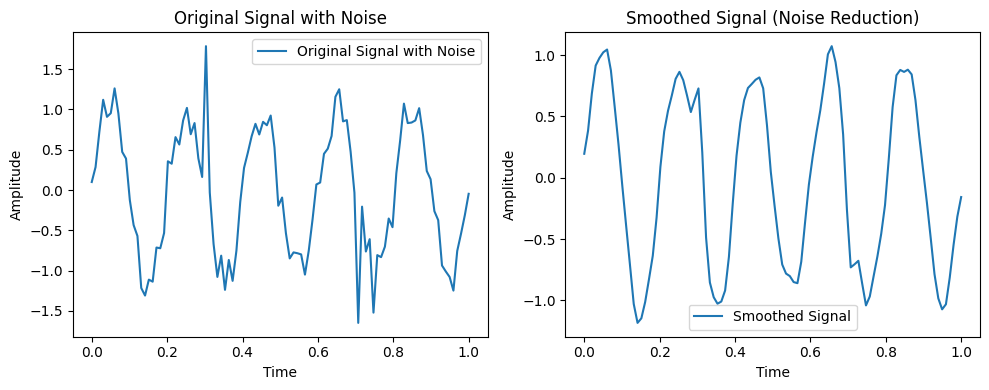

In [ ]:
# Generate a noisy signal
np.random.seed(42)
t = np.linspace(0, 1, 100)
signal = np.sin(2 * np.pi * 5 * t) + 0.2 * np.random.randn(100)
# Add impulsive noise (spikes)
signal[30] += 2.0
signal[70] -= 1.5
# Plot the original signal with noise
plt.figure(figsize=(10, 4))
plt.subplot(1, 2, 1)
plt.plot(t, signal, label='Original Signal with Noise')
plt.title('Original Signal with Noise')
plt.xlabel('Time')
plt.ylabel('Amplitude')
plt.legend()
# Apply Gaussian filter for noise reduction
smoothed_signal = gaussian_filter1d(signal, sigma=1)
# Plot the smoothed signal
plt.subplot(1, 2, 2)
plt.plot(t, smoothed_signal, label='Smoothed Signal')
plt.title('Smoothed Signal (Noise Reduction)')
plt.xlabel('Time')
plt.ylabel('Amplitude')
plt.legend()
plt.tight_layout()
plt.show()

In [ ]:
# Sample DataFrame with a categorical column
data = {'Category': ['A', 'B', 'A', 'C', 'B', 'A']}
df = pd.DataFrame(data)
# Display the original DataFrame
print("Original DataFrame:")
print(df)
# One-Hot Encoding
one_hot_encoded_df = pd.get_dummies(df, columns=['Category'], prefix=['Category'])
# Label Encoding (using category codes)
label_encoded_df = df.copy()
label_encoded_df['Category'] = df['Category'].astype('category').cat.codes
# Binary Encoding (using category codes to binary)
binary_encoded_df = df.copy()
binary_encoded_df['Category'] = df['Category'].astype('category').cat.codes.apply(lambda x: bin(x)[2:].zfill(2))
# Display the DataFrames after encoding
print("\nDataFrame after One-Hot Encoding:")
print(one_hot_encoded_df)
print("\nDataFrame after Label Encoding:")
print(label_encoded_df)
print("\nDataFrame after Binary Encoding:")
print(binary_encoded_df)

Original DataFrame:
  Category
0        A
1        B
2        A
3        C
4        B
5        A

DataFrame after One-Hot Encoding:
   Category_A  Category_B  Category_C
0        True       False       False
1       False        True       False
2        True       False       False
3       False       False        True
4       False        True       False
5        True       False       False

DataFrame after Label Encoding:
   Category
0         0
1         1
2         0
3         2
4         1
5         0

DataFrame after Binary Encoding:
  Category
0       00
1       01
2       00
3       10
4       01
5       00


In [ ]:
# Sample dataset with synthetic features
data = {'Age': [25, 30, 35, 40, 45],
'Income': [50000, 60000, 75000, 80000, 90000],
'Education': ['High School', 'Bachelor', 'Master', 'PhD', 'Bachelor']}
df = pd.DataFrame(data)
# Display the original DataFrame
print("Original DataFrame:")
print(df)
# Feature Engineering: Create new features
# 1. Age Group
df['Age Group'] = pd.cut(df['Age'], bins=[0, 30, 40, np.inf], labels=['Young', 'Mid-Age', 'Old'])
# 2. Income Level
df['Income Level'] = pd.cut(df['Income'], bins=[0, 60000, 80000, np.inf], labels=['Low', 'Medium', 'High'])
# 3. Binary Education Indicator (Bachelor's degree or higher)
df['Bachelor or Higher'] = (df['Education'] != 'High School').astype(int)
# Display the DataFrame after feature engineering
print("\nDataFrame after feature engineering:")
print(df)

Original DataFrame:
   Age  Income    Education
0   25   50000  High School
1   30   60000     Bachelor
2   35   75000       Master
3   40   80000          PhD
4   45   90000     Bachelor

DataFrame after feature engineering:
   Age  Income    Education Age Group Income Level  Bachelor or Higher
0   25   50000  High School     Young          Low                   0
1   30   60000     Bachelor     Young          Low                   1
2   35   75000       Master   Mid-Age       Medium                   1
3   40   80000          PhD   Mid-Age       Medium                   1
4   45   90000     Bachelor       Old         High                   1


In [ ]:
# Generate a large sample dataset
data = {'Feature1': np.random.rand(100000),
'Feature2': np.random.rand(100000),
'Feature3': np.random.rand(100000)}
df = pd.DataFrame(data)
# Display the size of the original dataset
print("Original Dataset Size:", df.shape)
# Randomly sample a fraction of the data (for example, 10%)
sampled_df = df.sample(frac=0.10, random_state=42)
# Display the size of the reduced dataset
print("Reduced Dataset Size:", sampled_df.shape)

Original Dataset Size: (100000, 3)
Reduced Dataset Size: (10000, 3)


In [ ]:
# Sample DataFrame with a datetime column
data = {'Date': ['2022-01-15', '2022-02-20', '2022-03-25'],
'Event': ['Event A', 'Event B', 'Event C']}
df = pd.DataFrame(data)
# Convert 'Date' column to datetime format
df['Date'] = pd.to_datetime(df['Date'])
# Display the original DataFrame
print("Original DataFrame:")
print(df)
# Datetime transformations
# Extract year, month, and day
df['Year'] = df['Date'].dt.year
df['Month'] = df['Date'].dt.month
df['Day'] = df['Date'].dt.day
# Calculate time duration since a reference date
reference_date = pd.to_datetime('2022-01-01')
df['Days Since Reference'] = (df['Date'] - reference_date).dt.days
# Display the DataFrame after datetime transformations
print("\nDataFrame after Datetime Transformations:")
print(df)

Original DataFrame:
        Date    Event
0 2022-01-15  Event A
1 2022-02-20  Event B
2 2022-03-25  Event C

DataFrame after Datetime Transformations:
        Date    Event  Year  Month  Day  Days Since Reference
0 2022-01-15  Event A  2022      1   15                    14
1 2022-02-20  Event B  2022      2   20                    50
2 2022-03-25  Event C  2022      3   25                    83


In [ ]:
# Sample dataset with positive values
data = np.array([1, 2, 5, 10, 20, 50, 100])
# Logarithmic transformation
transformed_data = np.log(data)
# Display the original and transformed data
print("Original Data:")
print(data)
print("\nTransformed Data (Log Transformation):")
print(transformed_data)

Original Data:
[  1   2   5  10  20  50 100]

Transformed Data (Log Transformation):
[0.         0.69314718 1.60943791 2.30258509 2.99573227 3.91202301
 4.60517019]


In [ ]:
# Sample data from two different sources
data_source1 = {'ID': [1, 2, 3],
'Name': ['Alice', 'Bob', 'Carol']}
data_source2 = {'ID': [4, 5, 6],
'Name': ['Dave', 'Eve', 'Frank']}

In [ ]:
# Create DataFrames from the two sources
df1 = pd.DataFrame(data_source1)
df2 = pd.DataFrame(data_source2)
# Concatenate or merge the DataFrames to perform data integration
integrated_df = pd.concat([df1, df2], ignore_index=True)
# Display the integrated DataFrame
print(integrated_df)

   ID   Name
0   1  Alice
1   2    Bob
2   3  Carol
3   4   Dave
4   5    Eve
5   6  Frank


In [ ]:
# Sample data
data = {'Date': ['2021-01-01', '2021-01-01', '2021-01-02', '2021-01-02'],
'Sales': [1000, 1200, 800, 900]}
df = pd.DataFrame(data)
# Display the original DataFrame
print("Original DataFrame:")
print(df)
# Data aggregation: Sum of sales by date
aggregated_df = df.groupby('Date')['Sales'].sum().reset_index()
# Display the aggregated DataFrame
print("\nAggregatedDataFrame (Sum of Sales by Date):")
print(aggregated_df)

Original DataFrame:
         Date  Sales
0  2021-01-01   1000
1  2021-01-01   1200
2  2021-01-02    800
3  2021-01-02    900

AggregatedDataFrame (Sum of Sales by Date):
         Date  Sales
0  2021-01-01   2200
1  2021-01-02   1700


In [ ]:
from sklearn.model_selection import train_test_split
# Sample dataset (features and labels)
X = np.random.rand(100, 2) # 100 samples with 2 features
y = np.random.randint(0, 2, 100) # Binary labels (0 or 1)
# Split the data into training, validation, and test sets
X_train, X_temp, y_train, y_temp = train_test_split(X, y, test_size=0.4, random_state=42)
X_valid, X_test, y_valid, y_test = train_test_split(X_temp, y_temp, test_size=0.5, random_state=42)
# Display the sizes of the resulting sets
print("Training set size:", X_train.shape[0])
print("Validation set size:", X_valid.shape[0])
print("Test set size:", X_test.shape[0])

Training set size: 60
Validation set size: 20
Test set size: 20


In [ ]:
from sklearn.pre-processing import MinMaxScaler
# Sample data
data = np.array([[10, 20],
[15, 30],
[5, 10],
[25, 40]])
# Create a MinMaxScaler instance
scaler = MinMaxScaler()
# Fit the scaler to the data and transform the data
normalized_data = scaler.fit_transform(data)
# Display the normalized data
print("Normalized Data:")
print(normalized_data)

SyntaxError: invalid syntax (ipython-input-3781303073.py, line 1)

In [ ]:
from sklearn.pre-processing import StandardScaler
# Sample data
data = np.array([[10, 20],
[15, 30],
[5, 10],
[25, 40]])
# Create a StandardScaler instance
scaler = StandardScaler()
# Fit the scaler to the data and transform the data
standardized_data = scaler.fit_transform(data)
# Display the standardized data
print("Standardized Data:")
print(standardized_data)

SyntaxError: invalid syntax (ipython-input-2200430290.py, line 1)

In [ ]:
# Sample DataFrame with mixed data formats
data = {'Date': ['2021-01-15', '2021-02-20', '2021-03-25'],
'Amount': ['$100.50', '200.75 USD', '300.00'],
'Quantity': ['5', '3', '7.5 kg']}
df = pd.DataFrame(data)
# Display the original DataFrame
print("Original DataFrame:")
print(df)
# Standardize data formats
# Convert 'Date' column to datetime format
df['Date'] = pd.to_datetime(df['Date'])
# Remove non-numeric characters and convert 'Amount' column to float
df['Amount'] = df['Amount'].replace('[\$,]', '', regex=True)
# Remove non-numeric characters and convert 'Quantity' column to float
df['Quantity'] = df['Quantity'].replace('[a-zA-Z\,]', '', regex=True).astype(float)
# Display the DataFrame after standardizing data formats
print("\nDataFrame after standardizing data formats:")
print(df)

Original DataFrame:
         Date      Amount Quantity
0  2021-01-15     $100.50        5
1  2021-02-20  200.75 USD        3
2  2021-03-25      300.00   7.5 kg

DataFrame after standardizing data formats:
        Date      Amount  Quantity
0 2021-01-15      100.50       5.0
1 2021-02-20  200.75 USD       3.0
2 2021-03-25      300.00       7.5


<>:13: SyntaxWarning: invalid escape sequence '\$'
<>:15: SyntaxWarning: invalid escape sequence '\,'
<>:13: SyntaxWarning: invalid escape sequence '\$'
<>:15: SyntaxWarning: invalid escape sequence '\,'
/tmp/ipython-input-2332238673.py:13: SyntaxWarning: invalid escape sequence '\$'
  df['Amount'] = df['Amount'].replace('[\$,]', '', regex=True)
/tmp/ipython-input-2332238673.py:15: SyntaxWarning: invalid escape sequence '\,'
  df['Quantity'] = df['Quantity'].replace('[a-zA-Z\,]', '', regex=True).astype(float)


In [ ]:
# Import necessary libraries
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.model_selection import train_test_split
from sklearn.naive_bayes import MultinomialNB
from sklearn.metrics import accuracy_score, classification_report
# Sample text data
corpus = [
'This is a positive example.',
'I love working with Machine Learning.',
'Text data pre-processing is important for ML.',
'Negative examples can be challenging too.',
'Machine learning models learn from data.'
]
# Corresponding labels (0 for negative, 1 for positive)
labels = [1, 1, 1, 0, 1]
# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(corpus, labels, test_size=0.2, random_state=42)
# Text vectorization using Bag-of-Words (CountVectorizer)
vectorizer = CountVectorizer()
X_train_vectorized = vectorizer.fit_transform(X_train)
X_test_vectorized = vectorizer.transform(X_test)
# Train a simple classifier (Naive Bayes in this case)
classifier = MultinomialNB()
classifier.fit(X_train_vectorized, y_train)
# Make predictions on the test set
predictions = classifier.predict(X_test_vectorized)
# Evaluate the classifier
accuracy = accuracy_score(y_test, predictions)
report = classification_report(y_test, predictions)
# Print the results
print(f"Accuracy: {accuracy:.2f}")
print("\nClassification Report:\n", report)

Accuracy: 1.00

Classification Report:
               precision    recall  f1-score   support

           1       1.00      1.00      1.00         1

    accuracy                           1.00         1
   macro avg       1.00      1.00      1.00         1
weighted avg       1.00      1.00      1.00         1



In [ ]:
# Sample data
data = {'Age': [25, 30, 35, 40, 45, 50, 55, 60, 65, 70],
'Income': [50000, 60000, 75000, 80000, 90000, 100000, 110000, 120000, 130000, 140000]}
df = pd.DataFrame(data)
# Display the original DataFrame
print("Original DataFrame:")
print(df)
# Binning and Discretization for 'Age'
age_bins = [20, 40, 60, 80] # Define bin edges
age_labels = ['Young', 'Mid-Age', 'Old'] # Labels for bins
df['Age Group'] = pd.cut(df['Age'], bins=age_bins, labels=age_labels)
# Binning and Discretization for 'Income'
income_bins = [40000, 80000, 120000, 160000] # Define bin edges
income_labels = ['Low', 'Medium', 'High'] # Labels for bins
df['Income Level'] = pd.cut(df['Income'], bins=income_bins, labels=income_labels)
# Display the DataFrame after binning and discretization
print("\nDataFrame after Binning and Discretization:")
print(df)

Original DataFrame:
   Age  Income
0   25   50000
1   30   60000
2   35   75000
3   40   80000
4   45   90000
5   50  100000
6   55  110000
7   60  120000
8   65  130000
9   70  140000

DataFrame after Binning and Discretization:
   Age  Income Age Group Income Level
0   25   50000     Young          Low
1   30   60000     Young          Low
2   35   75000     Young          Low
3   40   80000     Young          Low
4   45   90000   Mid-Age       Medium
5   50  100000   Mid-Age       Medium
6   55  110000   Mid-Age       Medium
7   60  120000   Mid-Age       Medium
8   65  130000       Old         High
9   70  140000       Old         High
